**Import necessary Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

**Read the data using pandas framework with column names label and message**

In [ ]:
#dataset = pd.read_csv('/content/SMSSpamCollection',sep='\t',names=['label','message'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/drugsComTrain_raw.csv')
test=pd.read_csv('/content/drive/MyDrive/help/workong remote/data:run:py/datasets/drugsComTest_raw.csv')

In [ ]:
dataset = pd.concat([train, test])

dataset.drop(['uniqueID'],axis =1,inplace=True)

dataset.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
dataset['sentiment'] = dataset['rating'].apply(lambda rating : 1 if rating > 8 else 0)
dataset.head()

,drugName,condition,review,rating,date,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


Display first five rows from the dataset

**Based on the labels, the number of ham & spam messages are counted and plotted**

In [ ]:
dataset.groupby('sentiment').describe()

rating                                                  \
              count      mean       std  min  25%   50%   75%   max   
sentiment                                                             
0          110350.0  4.466425  2.759456  1.0  1.0   5.0   7.0   8.0   
1          104713.0  9.649442  0.477147  9.0  9.0  10.0  10.0  10.0   

          usefulCount                                                      
                count       mean        std  min  25%   50%   75%     max  
sentiment                                                                  
0            110350.0  20.237200  26.684675  0.0  4.0  11.0  26.0   771.0  
1            104713.0  36.182757  42.805758  0.0  9.0  23.0  48.0  1291.0

In [ ]:
dataset.sentiment.value_counts()

0    110350
1    104713
Name: sentiment, dtype: int64

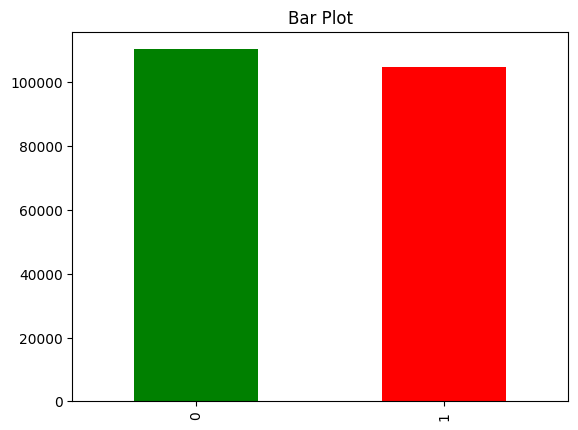

In [ ]:
count_Class=pd.value_counts(dataset['sentiment'], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

In [ ]:
#dataset['label'] = dataset['label'].map( {'spam': 1, 'ham': 0} )

In [ ]:
dataset.head()

,drugName,condition,review,rating,date,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1


**Put different Labels in separate pandas dataframe inorder to generate WORDCLOUD**

In [ ]:
data_good  = dataset[dataset['sentiment'] == 1].copy()
data_bad = dataset[dataset['sentiment'] == 2].copy()

In [ ]:
import wordcloud
from wordcloud import WordCloud
def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [ ]:
#show_wordcloud(data_good, "data_good")

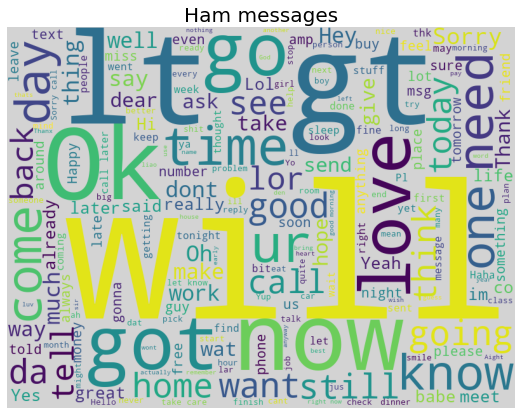

In [ ]:
show_wordcloud(data_bad, "data_bad messages")

**Import Necessary for text preprocessing & Training**

#preprocessing

In [ ]:
import nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')
#stop words The most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc
from nltk.corpus import stopwords

stop = stopwords.words('english')


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

from bs4 import BeautifulSoup
import re




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
dataset['review_clean'] = dataset['review'].apply(review_to_words)

<ipython-input-11-d3704c7e38b3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
dataset.head(5)

,drugName,condition,review,rating,date,usefulCount,sentiment,review_clean
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,1,side effect take combination bystolic mg fish oil
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0,first time using form birth control glad went ...
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,1,suboxone completely turned life around feel he...


In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

# split data into train and test set
from sklearn.model_selection import train_test_split

**Dataset split into Train & Test**

In [ ]:
X = dataset['review_clean'] .values
y = dataset['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Text feature engineering

**1. Tokenization**

**2. Text Encoding**

**3. Padding**

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)

In [ ]:
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[461, 1034, 86, 56, 3, 29, 3, 55, 6520, 336, 14, 1207, 110, 43, 24, 22, 284, 5894, 3, 137, 29, 454, 197, 630, 141, 262, 156, 43, 512, 73, 290, 337, 189, 26, 4424, 5039, 2, 55, 40, 114, 22, 136, 30, 157, 11, 267, 1, 380, 38, 600, 38, 610, 26, 11, 929, 16, 1050, 132, 1, 380, 761, 123, 141, 11, 30], [323, 178, 289, 2900, 124, 496, 4050, 529, 696, 1807, 2172, 7, 425, 718, 2219, 22, 209, 12207, 18922, 12, 7200, 1144, 114, 45, 11, 10, 365, 8, 1, 10, 1947, 199, 148, 1088, 196, 2147, 1309, 124, 211, 4781, 10, 425, 1798, 12762, 10, 12207, 11, 198, 425, 941, 1132, 18, 129, 19, 12207, 147, 18, 2172, 32, 49, 8929, 216]]


In [ ]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[  132     1   380 ...   141    11    30]
 [12207   147    18 ...    49  8929   216]
 [    5    18  1785 ...   301 11685  1984]
 ...
 [  326   190   268 ...     0     0     0]
 [ 1500   219  3437 ...    18   290    11]
 [  896   422    52 ...  2548    33   676]]


**Model is Built with vocabulary size as the input size.**

**Model is compiled and summary generated**

In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             1027512   
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                1176      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 1,028,713
Trainable params: 1,028,713
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# import libraries
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(SimpleRNN(units=24, return_sequences=False))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

**Model is trained and validated for test dataset with 50 epochs.**

**Callback is made at an early stage when the validation loss has its first minimum value.**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=20,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/20
5377/5377 [==============================] - 54s 10ms/step - loss: 0.5428 - accuracy: 0.7259 - val_loss: 0.5672 - val_accuracy: 0.7081
Epoch 2/20
5377/5377 [==============================] - 50s 9ms/step - loss: 0.5163 - accuracy: 0.7472 - val_loss: 0.5707 - val_accuracy: 0.7039
Epoch 3/20
5377/5377 [==============================] - 71s 13ms/step - loss: 0.4968 - accuracy: 0.7608 - val_loss: 0.5662 - val_accuracy: 0.7119
Epoch 4/20
5377/5377 [==============================] - 61s 11ms/step - loss: 0.4821 - accuracy: 0.7706 - val_loss: 0.5612 - val_accuracy: 0.7152
Epoch 5/20
5377/5377 [==============================] - 61s 11ms/step - loss: 0.4688 - accuracy: 0.7803 - val_loss: 0.5618 - val_accuracy: 0.7196
Epoch 6/20
5377/5377 [==============================] - 55s 10ms/step - loss: 0.4561 - accuracy: 0.7878 - val_loss: 0.5673 - val_accuracy: 0.7127
Epoch 7/20
5377/5377 [==============================] - 52s 10ms/step - loss: 0.4450 - accuracy: 0.7948 - val_loss: 0.5671 - 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')

**Model Predicted for test dataset.**

**Classification report and Confusion Matrix generated**

In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

1345/1345 [==============================] - 4s 3ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     22252
           1       0.74      0.71      0.73     20761

    accuracy                           0.74     43013
   macro avg       0.74      0.74      0.74     43013
weighted avg       0.74      0.74      0.74     43013

Accuracy : 0.7423104642782414


0.7423104642782414

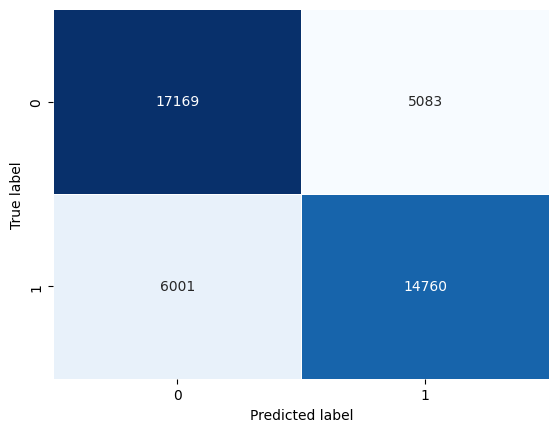

In [ ]:
plot_confusion_matrix(y_test, preds)

**Save the model and the tokenizer (picle package helps us to save the tokenizer to use it on new messages)**

In [ ]:
model.save("/content/drive/MyDrive/help/workong remote/data:run:py/drug/models/deeplearing/mo/modelrnn_after_20_epochs.h5")

**Load the model and the tokenizer and predict whether the new message is a spam / ham.**

In [ ]:
model.save("/content/drive/MyDrive/help/workong remote/data:run:py/drug/models/deeplearing/mo/model")

In [ ]:
import pickle
with open('model/tokenizer.pkl', 'wb') as output:
   pickle.dump(t, output, pickle.HIGHEST_PROTOCOL)

In [ ]:
import tensorflow as tf

s_model = tf.keras.models.load_model("spam_model")
with open('model/tokenizer.pkl', 'rb') as input:
    tokenizer = pickle.load(input)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sms = ["this nice drugr"]
#sms = ["hello! how are you? im visiting mom next week"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 24ms/step
1
